In [36]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import root_mean_squared_error
from sklearn.pipeline import Pipeline


In [6]:
data=fetch_california_housing()
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [7]:
df=pd.DataFrame(data.data,columns=data.feature_names)
y=pd.DataFrame(data.target,columns=data.target_names)
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64

In [8]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [9]:
y.describe()

,MedHouseVal
count,20640.000000
mean,2.068558
std,1.153956
min,0.149990
25%,1.196000
50%,1.797000
75%,2.647250
max,5.000010


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [11]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


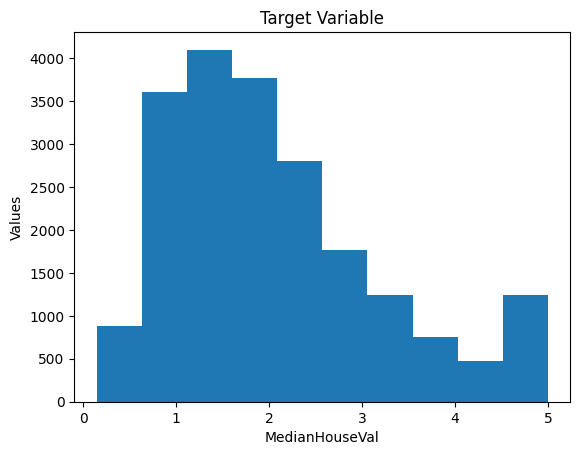

In [12]:
import matplotlib.pyplot as plt

plt.hist(y)
plt.xlabel("MedianHouseVal")
plt.ylabel("Values")
plt.title("Target Variable")
plt.show()

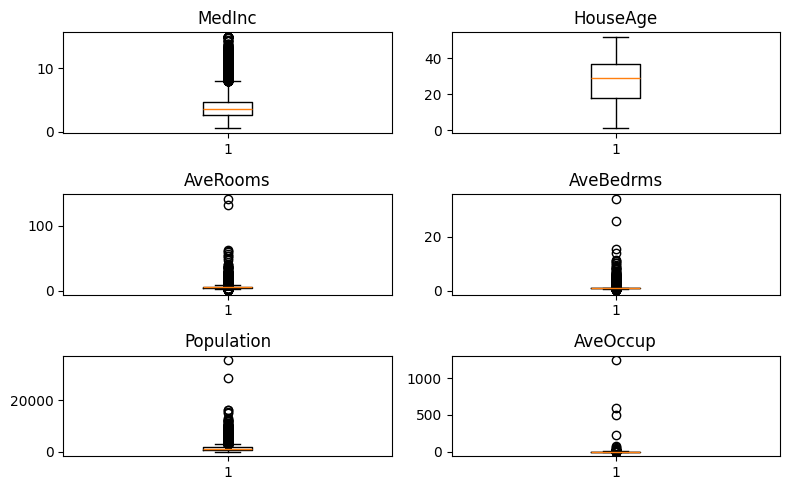

In [13]:
fig, axes = plt.subplots(3, 2, figsize=(8, 5))

for i in range(len(df.columns[:-2])):
    row = i // 2
    col = i % 2
    axes[row, col].boxplot(df[df.columns[i]])
    axes[row, col].set_title(df.columns[i])

plt.tight_layout()
plt.show()


In [14]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000


In [32]:
minmax_cols=["Population","Latitude","Longitude"]
standard_cols=[col for col in df.columns if col not in minmax_cols]
minmax_cols,standard_cols

(['Population', 'Latitude', 'Longitude'],
 ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'AveOccup'])

In [33]:

X_train,X_test,y_train,y_test=train_test_split(df,y,test_size=0.2,random_state=42)
X_train.shape,y_train.shape

((16512, 8), (16512, 1))

In [39]:
from sklearn.compose import ColumnTransformer

preprocessor_linear=ColumnTransformer(
    transformers=[
        ("standardscaler",StandardScaler(),standard_cols),
        ("minmaxscaler",MinMaxScaler(),minmax_cols)
    ],
    remainder="drop"
)

In [40]:
pipeline_linear=Pipeline(
    steps=[
        ("preprocessing",preprocessor_linear),
        ("model",LinearRegression())
    ]
)

In [41]:
pipeline_linear.fit(X_train,y_train)

,steps,"[('preprocessing', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('standardscaler', ...), ('minmaxscaler', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [42]:
y_pred_linear=pipeline_linear.predict(X_test)
rmse=root_mean_squared_error(y_test,y_pred_linear)
rmse

0.745581383012776

In [46]:
preprocessor_ensemble=ColumnTransformer(
    transformers=[
        ("standardscaler",StandardScaler(),standard_cols)
    ],
    remainder="passthrough"
)

In [47]:
pipeline_ensemble=Pipeline(
    steps=[
        ("standard_scaler",preprocessor_ensemble),
        ("model",RandomForestRegressor())
    ]
)

In [50]:
pipeline_ensemble.fit(X_train,y_train)

C:\Users\plpvk\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:1363: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


,steps,"[('standard_scaler', ...), ('model', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('standardscaler', ...)]"
,remainder,'passthrough'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [52]:
y_pred_ensemble=pipeline_ensemble.predict(X_test)

In [53]:
rmse2=root_mean_squared_error(y_test,y_pred_ensemble)
rmse2

0.5035848993762376